# Assignment 2

#### Import Libraries

In [69]:
import numpy as np
import pandas as pd
import missingno as msn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Load dataset

In [70]:
df = pd.read_csv("E:/Thapar/SEM5/DataAnalysis/Lab/Asg_2/USA_Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [71]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


#### Check Dataset

<AxesSubplot:>

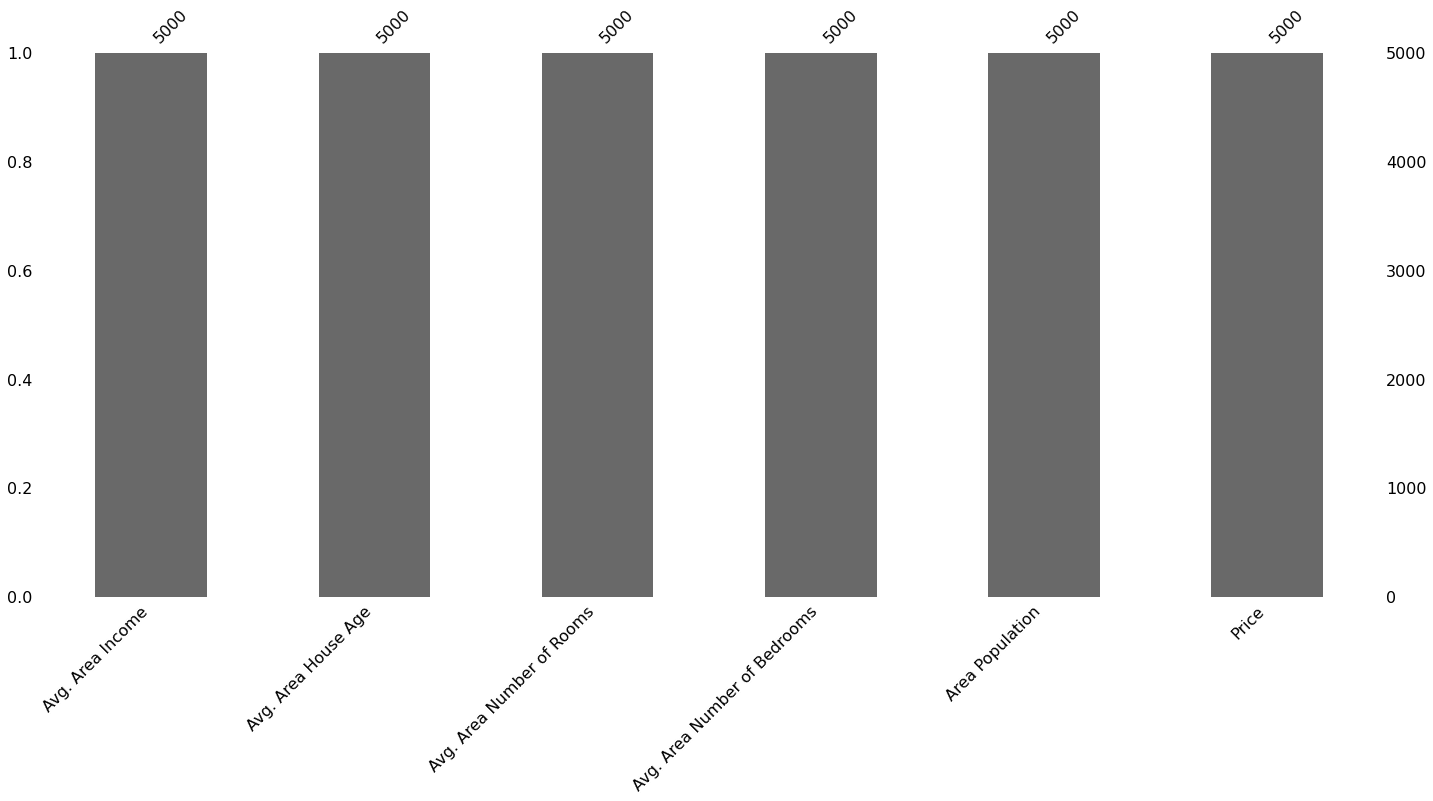

In [72]:
msn.bar(df)

<AxesSubplot:>

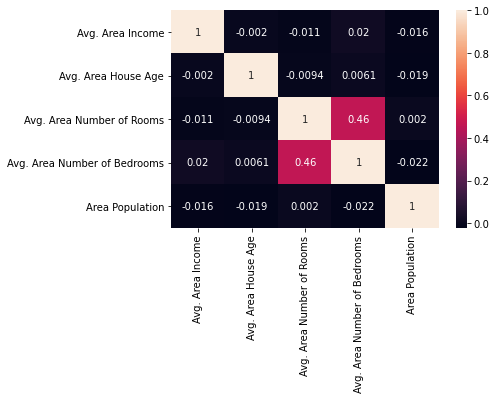

In [73]:
sns.heatmap(df.iloc[:,:5].corr(),annot=True)

#### Split DataSet in Input/Output

In [74]:
X = df.iloc[:,:5]
Y = df.iloc[:,5]

#### Scaled Input Data

In [75]:
StdSc = StandardScaler()
X_scaled = StdSc.fit_transform(X)
print(X_scaled)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


#### Insert beta 0 in scaled dataset

In [76]:
X_new = np.insert(X_scaled, 0, 1, axis=1)
print(X_new)

[[ 1.          1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.          1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [ 1.         -0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [ 1.         -0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [ 1.         -0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [ 1.         -0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


#### Split  dataset into 5 folds 

In [77]:
size = len(df.index)
fold_count = 5
chunk_size = size//5
fold_lst = []
total_chunk = list(df.index)
for x in range(fold_count):
    test_lst = np.arange(x*chunk_size,(x+1)*chunk_size)
    train_lst = np.arange(0,x*chunk_size)
    train_lst = np.concatenate((train_lst, np.arange((x+1)*chunk_size, size)))
    fold_lst.append((test_lst,train_lst))

#### solving beta function

In [78]:
def solveBeta(X, Y):
    A = X.T.dot(X)
    B = np.linalg.inv(A)
    C = B.dot(X.T)
    beta = C.dot(Y)
    return beta

#### R2 Error function

In [79]:
def r2_error(Y_predict, Y_test):
    err = Y_predict-Y_test
    sse = np.sum(err**2)
    Y_mean = np.mean(Y_test)
    tot_var = np.sum((Y_test-Y_mean)**2)
    r2e = 1-sse/tot_var
    return r2e

#### Predict function

In [80]:
def predict(X, beta):
    Y_predict = X.dot(beta)
    return Y_predict

#### finding best beta matrix 5 K fold

In [81]:
score_lst = []
beta_lst = []
for test_idx, train_idx in fold_lst:
    X_train,X_test,Y_train,Y_test = X_new[train_idx],X_new[test_idx],Y[train_idx],Y[test_idx]
    beta = solveBeta(X_train,Y_train)
    beta_lst.append(beta)
    Y_predict = predict(X_test, beta)
    R2err = r2_error(Y_predict, Y_test)
    score_lst.append(R2err)
print(score_lst)

[0.9175899480765107, 0.920301549640113, 0.9152429915320015, 0.9208503836977656, 0.9138111758717494]


In [82]:
max_score = max(score_lst)
max_idx = score_lst.index(max_score)
best_beta = beta_lst[max_idx]
print(best_beta)

[1.23144707e+06 2.29921558e+05 1.64523054e+05 1.19737507e+05
 1.12425659e+03 1.51317802e+05]


#### test on 30% data

In [83]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3,random_state = 41)
Y_predict = predict(X_test, best_beta)
R2err = r2_error(Y_predict, Y_test)
print(R2err)

0.9194842237268729
